# Labour Portfolio Shave (Tuple Method)

Reduce the number of Portfolio by deleting those which are suboptimal due to their production being above the Maximum Demand.  
Method for when Labour Portfolio is a Tuple.

### Input Variables:

$\mathbf{L}$ Labour Portfolios in Tuple   
$\mathbb{F}$ Vector with Tenure Productivities   
  
$M_D$ Maximum Demand in the Economy

### Output Vatiables:

$\mathbf{L}$ New Reduced Labour Portfolios in Tuple  
$S_L$ New Size of States of the Labour Portfolios

## Function:

In [24]:
function Shave(L::(Any...),F::Array{Float64,1},M_D::Float64)
    
    """Reduce the number of Portfolio by deleting 
    those which are suboptimal due to their production 
    being above the Maximum Demand. (Tuple Method)

    Parameters
    ----------
    L  : Labour Portfolios (Tuple)
    F  : Productivity
    M_D: Maximum Demand
    
    Parameters
    ----------
    NewL : New Reduced Labour Portfolios (Tuple)
    SizeL: New Size of States of the Labour Portfolios
    """

    MaxF=M_D+maximum(F);
    
    NewL=L[reshape([L...],length(L[1]),length(L))'*F.<=MaxF];
    
    SizeL=length(NewL);
    
    return NewL, SizeL
    
end

Shave (generic function with 1 method)

## Example

### Parameters:

In [25]:
using LabourDP: Production, LabourPortfolioT

# Create Labour Portfolio
G=3;
N=3;

M_D=9.;
F_G=1.;

Labour=LabourPortfolioT(G,N,M_D,F_G);

# Create Production Function
F_0=0.8;
F_G=1.0;
F̂=1.2;
Ĝ=2;

F=Production(G,F_0,F_G,F̂,Ĝ);

In [26]:
NLabour=Shave(Labour[1],F,M_D);

#### Transition Matrix

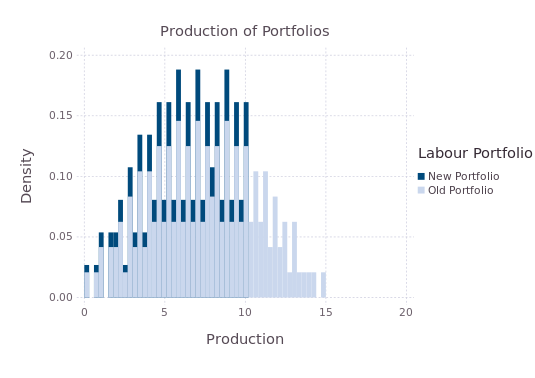

In [33]:
using Gadfly
using Color

FL=reshape([Labour[1]...],length(Labour[1][1]),Labour[2])'*F;
NFL=reshape([NLabour[1]...],length(NLabour[1][1]),NLabour[2])'*F;

plot(layer(x=FL,
Theme(default_color=color(RGB(202/255,215/255,237/255))),
Geom.histogram(bincount=50,density=true)),
layer(x=NFL,
Theme(default_color=color(RGB(0/255,74/255,124/255))),
Geom.histogram(bincount=34,density=true)),
Guide.ylabel("Density"),
Guide.xlabel("Production"),
Guide.title("Production of Portfolios"),
Guide.manual_color_key("Labour Portfolio",
["New Portfolio", "Old Portfolio"],
[color(RGB(0/255,74/255,124/255)), color(RGB(202/255,215/255,237/255))]))